In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print(data.head())
print(data.info())

# Check for missing values in the dataset
print("Missing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Preprocess the data
# Normalize the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop the 'Time' column as it may not be useful for modeling
data = data.drop(columns=['Time'])

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Check for NaN values in y
print("Missing values in target variable:")
print(y.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the classifier (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Train with Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)
y_pred_lr = log_reg.predict(X_test)

# Evaluate Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
print("Logistic Regression Precision-Recall AUC:", pr_auc_lr)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# ... (rest of your code)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)


DecisionTreeClassifier()

In [38]:
data.shape

(39701, 30)

In [39]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,...,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,3.970100e+04,39701.000000
mean,-0.213965,0.051976,0.713781,0.189453,-0.231055,0.100909,-0.112956,0.041727,0.214191,-0.071485,...,-0.029662,-0.112320,-0.040265,0.007226,0.136322,0.023181,0.008097,0.004171,1.718146e-17,0.002620
std,1.831768,1.548377,1.506747,1.399794,1.379437,1.304738,1.244266,1.222758,1.225160,1.124930,...,0.750969,0.638109,0.551644,0.593281,0.435481,0.504830,0.385255,0.298453,1.000013e+00,0.051115
min,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,-3.728014e-01,0.000000
25%,-0.967143,-0.525156,0.233423,-0.717699,-0.835582,-0.638649,-0.597714,-0.152452,-0.555907,-0.552075,...,-0.236834,-0.534709,-0.178626,-0.325662,-0.128065,-0.330371,-0.063315,-0.006938,-3.416799e-01,0.000000
50%,-0.233775,0.101426,0.818166,0.185128,-0.267798,-0.158707,-0.073360,0.048383,0.091883,-0.130461,...,-0.077298,-0.086811,-0.051646,0.060796,0.176097,-0.063305,0.008394,0.021454,-2.729142e-01,0.000000
75%,1.160709,0.743772,1.447852,1.071353,0.297070,0.487036,0.433883,0.314949,0.930747,0.378396,...,0.100244,0.299013,0.076971,0.399378,0.421048,0.304110,0.085116,0.075965,-3.600707e-02,0.000000
max,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,3.321890e+01,1.000000


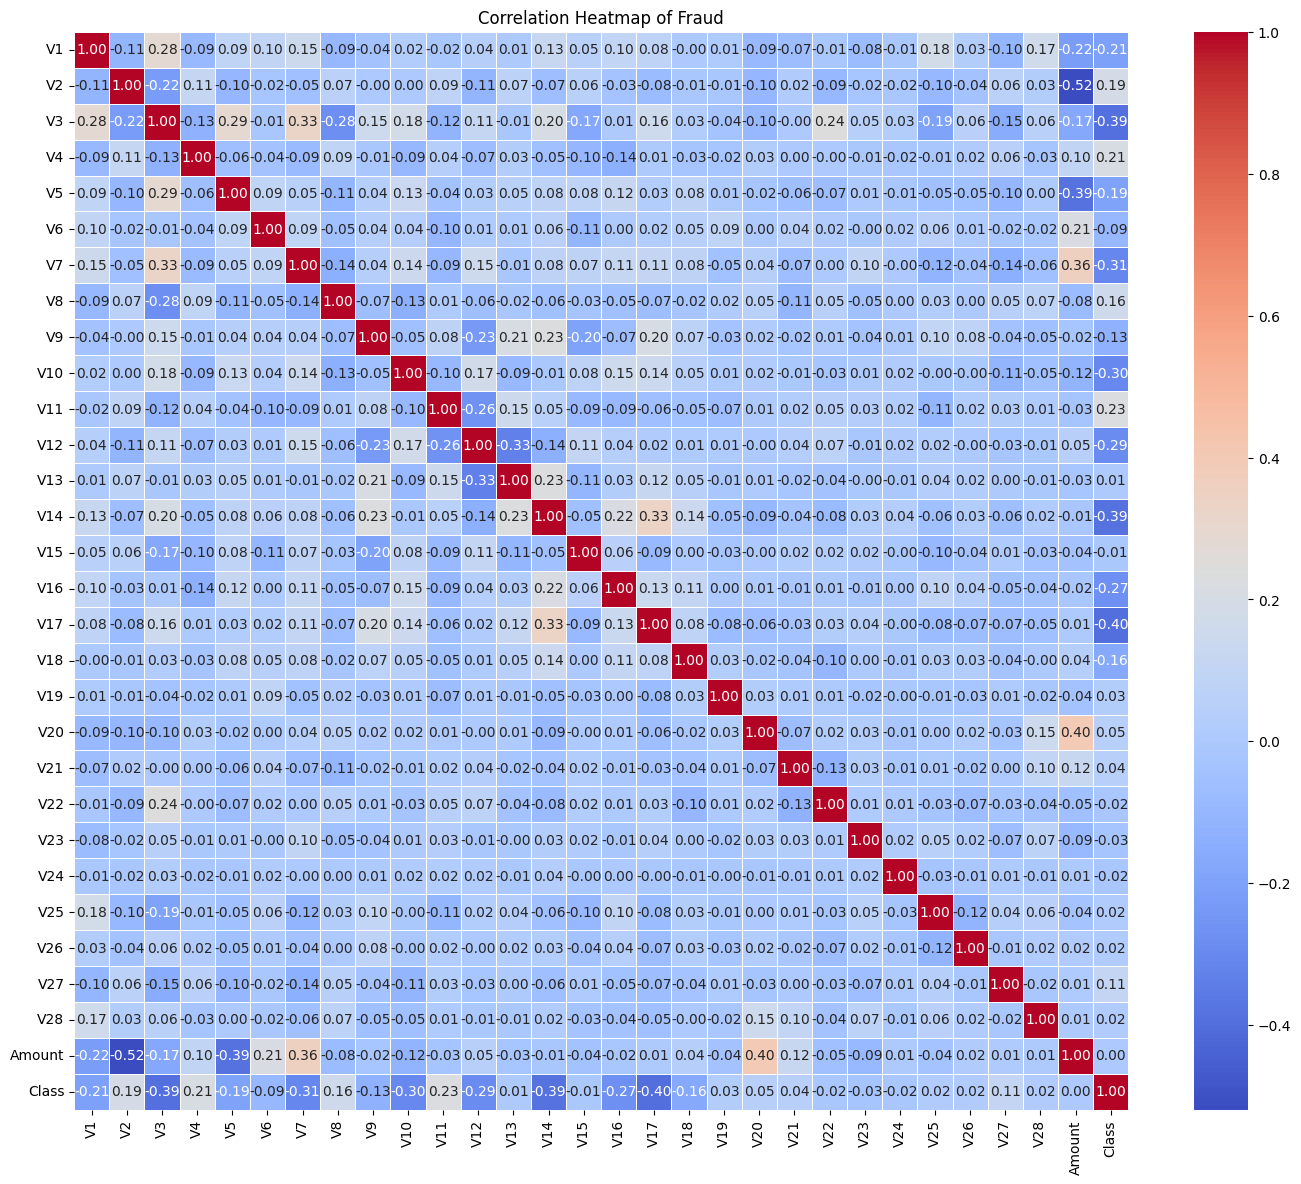

In [47]:
#  #Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns # Don't forget to import seaborn!

plt.figure(figsize=(17, 14))
# Use 'data' instead of 'df'
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Fraud')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


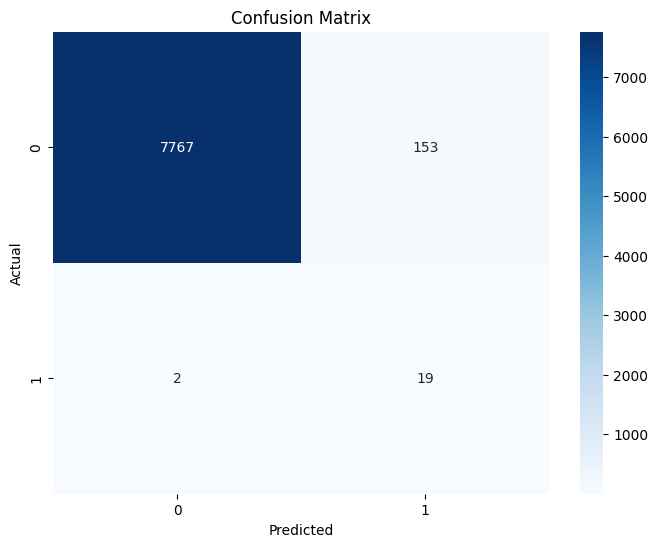

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      7920
         1.0       0.11      0.90      0.20        21

    accuracy                           0.98      7941
   macro avg       0.56      0.94      0.59      7941
weighted avg       1.00      0.98      0.99      7941



In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for heatmap


# Train Logistic Regression (assuming you have trained the model in previous steps)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions using Logistic Regression
prediction_test_LR = log_reg.predict(X_test) # Assign predictions to the variable

# Confusion matrix
conf_matrix_LR = confusion_matrix(y_test, prediction_test_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_LR)
print('Classification Report:')
print(class_report)

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix, accuracy_score, roc_auc_score # Import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for heatmap




#MODEL EVALUATION
#ACCURACY AND ROC_AUC SCORE LOGISTIC REGRESSION

prediction_test_LR = model_LR.predict(X_test)
prediction_test_LR_roc_auc = model_LR.predict_proba(X_test)

accuracy_LR = accuracy_score(y_test, prediction_test_LR) # Now you can use accuracy_score
roc_auc_LR = roc_auc_score(y_test, prediction_test_LR_roc_auc[:, 1], multi_class='ovr') # Now roc_auc_score is available
print(f'Accuracy LOGISTIC REGRESSION: {accuracy_LR * 100:.2f}%')
print(f'ROC AUC Score LOGISTIC REGRESSION: {roc_auc_LR:.2f}')

Accuracy LOGISTIC REGRESSION: 99.80%
ROC AUC Score LOGISTIC REGRESSION: 0.99


In [18]:
#UNDER SAMPLING
# Assuming 'data' is your original DataFrame and 'Class' is the column indicating fraud (1) or not (0)
legit_df = data[data['Class'] == 0]  # Create a DataFrame with only legitimate transactions
legit_sample = legit_df.sample(n=492)
legit_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38344,1.430606,-0.728581,0.617990,-0.625919,-1.050452,-0.042594,-1.002180,0.005290,-0.077658,0.469519,...,0.216635,0.796419,-0.253175,-0.382746,0.719764,0.048273,0.042954,0.010605,-0.346028,0.0
6919,-1.780345,-0.251174,2.809322,-0.283566,-1.588968,1.994344,-0.619620,1.220757,2.344525,-1.823541,...,0.147647,0.726989,0.186831,-0.246614,0.244942,1.195873,0.089205,0.038009,0.501670,0.0
29993,1.201664,-0.902839,0.707482,-1.631246,-1.377516,-0.389126,-0.853815,0.098592,0.067674,-0.068493,...,-0.287410,-0.337319,0.102173,0.186750,0.180830,-0.788656,0.106376,0.035472,-0.182704,0.0
31214,-3.333724,-0.496387,-0.966521,-0.211259,-3.003453,0.840152,1.406946,0.879003,0.078282,-1.213129,...,-0.086729,0.630759,0.338201,0.180412,-0.378082,0.934565,0.378396,-0.801765,1.621362,0.0
36088,1.296157,-0.493231,0.117376,-0.842163,-0.644984,-0.689309,-0.240172,-0.172789,-1.364952,0.742634,...,-0.213979,-0.903104,0.102132,-0.012663,0.215950,-0.648671,-0.017801,0.017159,-0.092068,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39505,1.028789,-0.517357,1.576274,1.035169,-1.067977,1.056791,-1.045223,0.493294,1.321934,-0.373992,...,-0.121540,0.136579,-0.014676,0.100192,0.297531,0.397397,0.058823,0.014757,-0.293292,0.0
39613,1.270465,-0.565852,0.027900,-0.705847,-0.723220,-0.189520,-0.833091,0.189632,-0.779931,0.319712,...,0.108082,0.109453,-0.034927,-0.428176,0.251197,-0.248511,0.027655,0.031091,-0.203125,0.0
3130,1.076448,0.634614,0.579327,2.923779,-0.036069,-0.030389,-0.008460,0.054571,-0.383597,-0.007739,...,-0.081443,0.032455,-0.039741,0.338468,0.534183,0.084953,0.043551,0.047122,-0.340486,0.0
21145,-0.614115,0.172574,0.754197,0.165787,2.135071,4.163269,-0.749570,1.139804,0.144374,-0.181272,...,0.016402,0.065337,-0.032392,1.007833,-0.225052,-0.331657,0.077599,0.196393,-0.330212,0.0


In [21]:
# Assuming 'data' is your original DataFrame and 'Class' is the column indicating fraud (1) or not (0)
legit_df = data[data['Class'] == 0]  # Create a DataFrame with only legitimate transactions
legit_sample = legit_df.sample(n=492)

fraud_df = data[data['Class'] == 1]  # Create a DataFrame with only fraudulent transactions

new_df = pd.concat([legit_sample, fraud_df], axis=0) # Now you can concatenate
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29389,-0.740318,0.281452,1.892085,0.584590,-1.526618,1.131258,-0.558372,0.946623,0.929219,-0.846307,...,0.024854,0.348834,0.136281,0.264952,-0.536265,0.272473,-0.117209,-0.053311,0.014214,0.0
21730,-0.759154,0.258604,2.016444,2.195748,1.384188,5.641527,-1.290058,1.598849,0.210746,0.369811,...,0.056769,0.529480,-0.293269,1.068841,0.412215,0.566676,0.409649,0.163366,-0.191742,0.0
27958,1.061632,-0.004476,0.472069,1.423305,-0.511754,-0.456862,0.043257,0.021658,0.162346,0.095316,...,-0.047692,-0.122958,-0.107882,0.519495,0.628812,-0.373630,0.004993,0.017077,-0.142630,0.0
19699,1.106929,0.162229,0.157438,1.255738,-0.433712,-1.255895,0.411784,-0.272373,-0.025190,0.018331,...,0.020691,-0.089861,-0.099754,0.698666,0.630104,-0.382413,-0.014434,0.029481,-0.077659,0.0
16726,-0.275736,-0.072363,1.072662,-1.657564,-0.270695,-1.040499,0.472995,-0.186709,-0.914657,0.638208,...,0.263703,0.896295,-0.108703,0.522230,-0.369129,-0.384390,0.209699,0.001798,-0.270484,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,-0.311155,1.0
30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,-7.833556,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,0.103400,1.0
31002,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,0.103400,1.0
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.320321,1.0


In [22]:
#ACCURACY DECISION TREE CLASSIFIER

prediction_test_DTC = model_DTC.predict(X_test)
prediction_test_DTC_roc_auc = model_DTC.predict_proba(X_test)
accuracy_DTC = accuracy_score(y_test, prediction_test_DTC)
roc_auc_DTC = roc_auc_score(y_test, prediction_test_DTC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy DECISION TREE CLASSIFIER: {accuracy_DTC * 100:.2f}%')
print(f'ROC AUC Score DECISION TREE CLASSIFIER: {roc_auc_DTC:.2f}')#

Accuracy DECISION TREE CLASSIFIER: 99.94%
ROC AUC Score DECISION TREE CLASSIFIER: 0.95


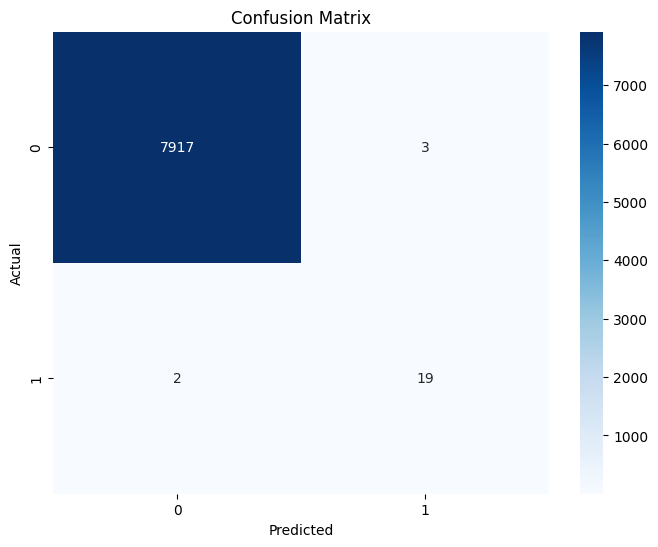

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7920
         1.0       0.86      0.90      0.88        21

    accuracy                           1.00      7941
   macro avg       0.93      0.95      0.94      7941
weighted avg       1.00      1.00      1.00      7941



In [23]:
#CONFUSION MATRIX AND CLASSIFICATION REPORT DECISION TREE CLASSIFIER

# Confusion matrix
conf_matrix_DTC = confusion_matrix(y_test, prediction_test_DTC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_DTC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_DTC)
print('Classification Report:')
print(class_report)

In [27]:
#ACCURACY RANDOM FOREST CLASSIFIER

prediction_test_RFC = model_RFC.predict(X_test)
prediction_test_RFC_roc_auc = model_RFC.predict_proba(X_test)
accuracy_RFC = accuracy_score(y_test, prediction_test_RFC)
roc_auc_RFC = roc_auc_score(y_test, prediction_test_RFC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy RANDOM FOREST CLASSIFIER: {accuracy_RFC * 100:.2f}%')
print(f'ROC AUC Score RANDOM FOREST CLASSIFIER: {roc_auc_RFC:.2f}')


Accuracy RANDOM FOREST CLASSIFIER: 99.94%
ROC AUC Score RANDOM FOREST CLASSIFIER: 0.98


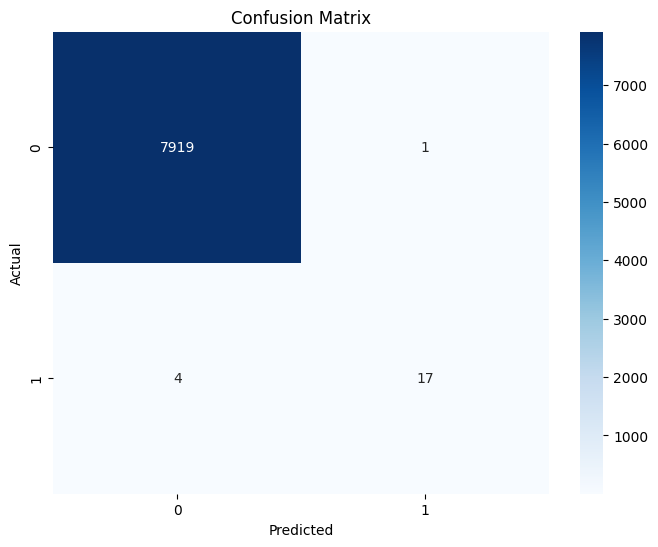

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7920
         1.0       0.94      0.81      0.87        21

    accuracy                           1.00      7941
   macro avg       0.97      0.90      0.94      7941
weighted avg       1.00      1.00      1.00      7941



In [28]:
#CONFUSION MATRIX AND CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER

# Confusion matrix
conf_matrix_RFC = confusion_matrix(y_test, prediction_test_RFC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RFC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(y_test, prediction_test_RFC)
print('Classification Report:')
print(class_report)

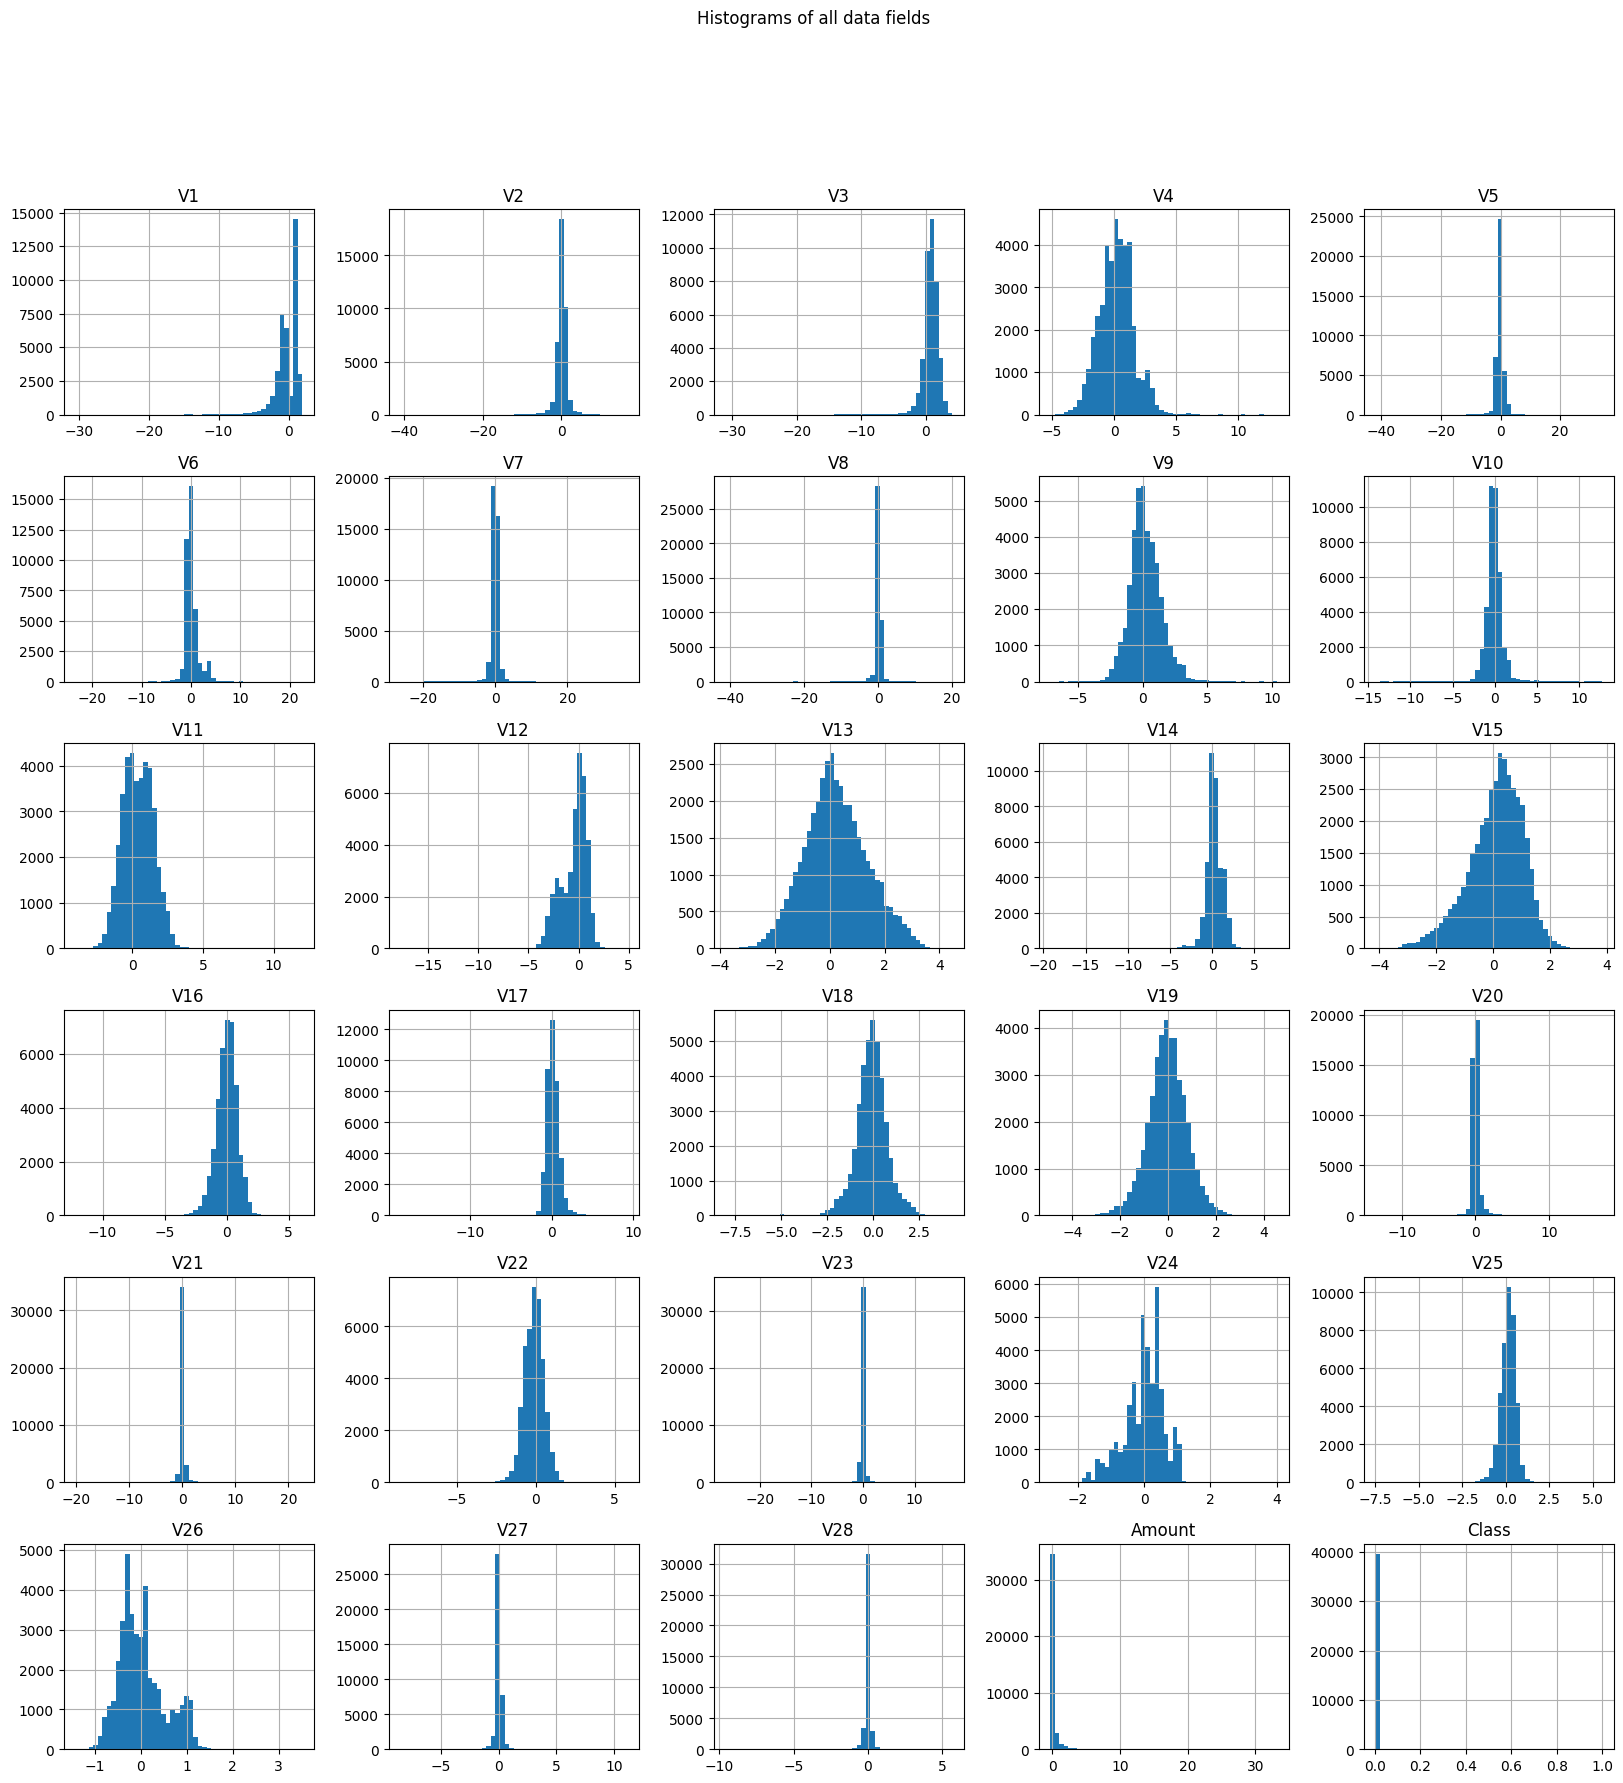

In [31]:
# Histograms of all the data fields
data.hist(figsize=(20, 20), bins=50) # Use 'data' instead of 'dataset'
plt.suptitle('Histograms of all data fields')
plt.show()

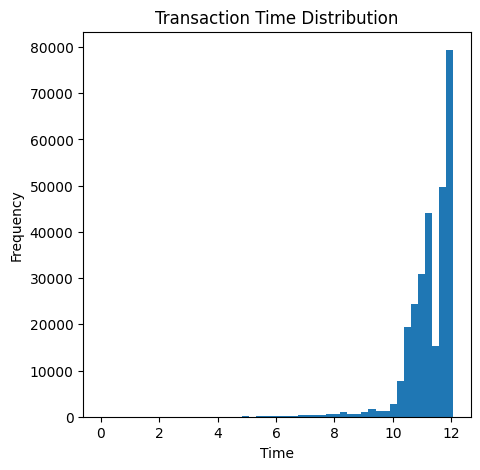

In [35]:
# Load your dataset here, for example using pandas
import pandas as pd
dataset = pd.read_csv('/content/creditcard.csv')  # Replace 'your_dataset.csv' with the actual path

# Now you can use the 'dataset' variable
dataset['Time_log'] = np.log1p(dataset['Time'])
plt.figure(figsize=(5, 5))
plt.hist(dataset['Time_log'], bins=50)
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()